In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [3]:
import src.models.LogisticRegression as LogReg
import src.features.build_features as FeaturesManager
import src.visualization.visualize as VizManager
import pickle
from comet_ml import API
import os
from sklearn.metrics import classification_report

import src.models.HP_AdaBoost as HP_AdaBoost
import src.models.HP_KNN as KNN
import src.models.HP_RandomForest as RandomForest

In [4]:
api = API()

workspace_name = "ift6758-a22-g08"

# Download the Logistic Regresion on Distance
api.download_registry_model(workspace_name, "logisticregression-distance", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_distance.pkl")
with open(pkl_filename, 'rb') as file:
    clf_distance = pickle.load(file)


# Download the Logistic Regresion on Angle
api.download_registry_model(workspace_name, "logisticregression-angle", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_angle.pkl")
with open(pkl_filename, 'rb') as file:
    clf_angle = pickle.load(file)


# Download the Logistic Regresion on Distance and Angle
api.download_registry_model(workspace_name, "logisticregression-distance-angle", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_distance_angle.pkl")
with open(pkl_filename, 'rb') as file:
    clf_distance_angle = pickle.load(file)


# Download the Adaboost / Anova
api.download_registry_model(workspace_name, "adaboost-anova", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "Adaboost_Anova.pkl")
with open(pkl_filename, 'rb') as file:
    clf_adaboost_anova = pickle.load(file)


# Download the Random FOrest
api.download_registry_model(workspace_name, "randomforest", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "randomforest.pkl")
with open(pkl_filename, 'rb') as file:
    clf_random_forest = pickle.load(file) 
    
# Download the Knn / Linear SVC
api.download_registry_model(workspace_name, "knn-lasso", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "KNN_Lasso.pkl")
with open(pkl_filename, 'rb') as file:
    clf_knn = pickle.load(file)

COMET INFO: Downloading registry model 'logisticregression-distance', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'logisticregression-angle', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'logisticregression-distance-angle', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'adaboost-anova', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'randomforest', version '1.0.0', stage None from workspace 

In [5]:
# Test the Logistic Regression models on 2019 / Regular
season_year = 2019
season_type = "Regular"    
features_data = FeaturesManager.build_features([season_year], season_type)
# We take the absolute value, for symmetry reasons
features_data['Shot angle'] = features_data['Shot angle'].abs()
y_test = features_data['Is Goal']

X_test = features_data[['Shot distance']]
print(classification_report(y_test, clf_distance.predict(X_test)))

X_test = features_data[['Shot angle']]
print(classification_report(y_test, clf_angle.predict(X_test)))

X_test = features_data[['Shot distance', 'Shot angle']]
print(classification_report(y_test, clf_distance_angle.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     59641
         1.0       0.00      0.00      0.00      6404

    accuracy                           0.90     66045
   macro avg       0.45      0.50      0.47     66045
weighted avg       0.82      0.90      0.86     66045

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     59641
         1.0       0.00      0.00      0.00      6404

    accuracy                           0.90     66045
   macro avg       0.45      0.50      0.47     66045
weighted avg       0.82      0.90      0.86     66045

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     59641
         1.0       0.00      0.00      0.00      6404

    accuracy                           0.90     66045
   macro avg       0.45      0.50      0.47     66045
weighted avg       0.82      0.90      0.86     66045



In [7]:
X_test_adaboost, y_test_adaboost = HP_AdaBoost.GetTestingData(season_year, season_type)
print(classification_report(y_test_adaboost, clf_adaboost_anova.predict(X_test_adaboost)))

X_test_forest, y_test_forest, _, _ ,_ = RandomForest.GetTestingData(season_year, season_type)
print(classification_report(y_test_forest, clf_random_forest.predict(X_test_forest)))

X_test_knn, y_test_knn = KNN.GetTestingData()
print(classification_report(y_valid_knn, clf_knn.predict(X_valid_knn)))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     59641
         1.0       0.34      0.35      0.34      6383

    accuracy                           0.87     66024
   macro avg       0.63      0.64      0.63     66024
weighted avg       0.87      0.87      0.87     66024

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     59641
         1.0       0.35      0.39      0.36      6404

    accuracy                           0.87     66045
   macro avg       0.64      0.65      0.65     66045
weighted avg       0.88      0.87      0.87     66045

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     55434
         1.0       0.71      0.14      0.24      5574

    accuracy                           0.92     61008
   macro avg       0.81      0.57      0.60     61008
weighted avg       0.90      0.92      0.89     61008



In [ ]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_clf_adaboost = CalibratedClassifierCV(base_estimator=clf_adaboost_anova, cv=5)
calibrated_clf_adaboost.fit(X_test_adaboost, y_test_adaboost)

calibrated_clf_forest = CalibratedClassifierCV(base_estimator=clf_random_forest, cv=5)
calibrated_clf_forest.fit(X_test_forest, y_test_forest)

CalibratedClassifierCV(base_estimator=Pipeline(steps=[('fill_nan',
                                                       ColumnTransformer(remainder='passthrough',
                                                                         transformers=[('cat',
                                                                                        SimpleImputer(strategy='most_frequent'),
                                                                                        ['Shot '
                                                                                         'Type',
                                                                                         'Strength',
                                                                                         'Shooter '
                                                                                         'Side',
                                                                                         'Shooter '
                                                                                         'Ice '
                                                                                         'Position',
                                                                                         'Period',
                                                                                         'Num '
                                                                                         'players '
                                                                                         'With',
                                                                                         'Num '
                                                                                         'players '
                                                                                         'Against',
                                                                                         'Is '
                                                                                         'Empty',
                                                                                         'Rebound']),
                                                                                       ('num',
                                                                                        SimpleImputer(strategy='median...
                                                                                         'st_Y',
                                                                                         'Last '
                                                                                         'event '
                                                                                         'distance',
                                                                                         'Last '
                                                                                         'event '
                                                                                         'angle'])])),
                                                      ('one_hot',
                                                       ColumnTransformer(remainder='passthrough',
                                                                         transformers=[('enc',
                                                                                        OneHotEncoder(sparse=False),
                                                                                        [0,
                                                                                         1,
                                                                                         2,
                                                                                         3])])),
                                                      ('clf_forest',
                                                       BalancedRandomForestClassifier(criterion='entropy',
      

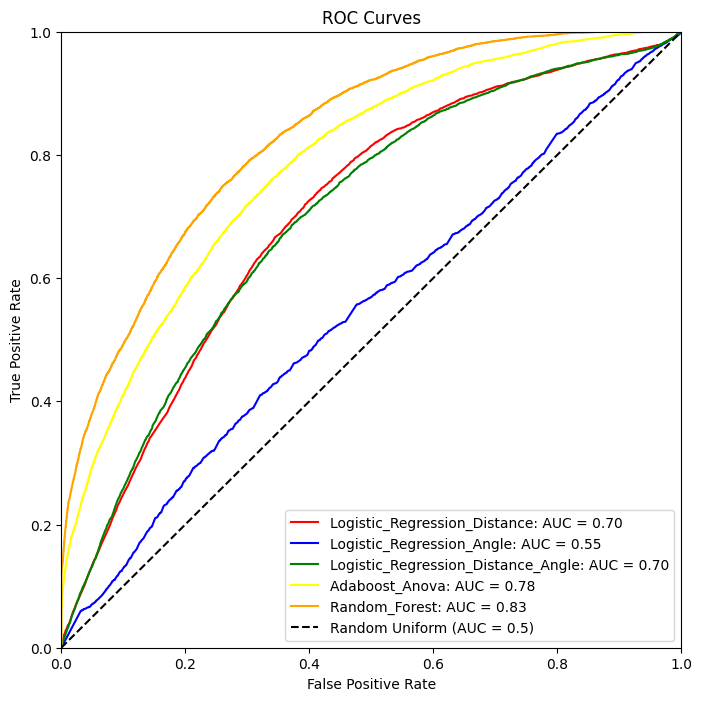

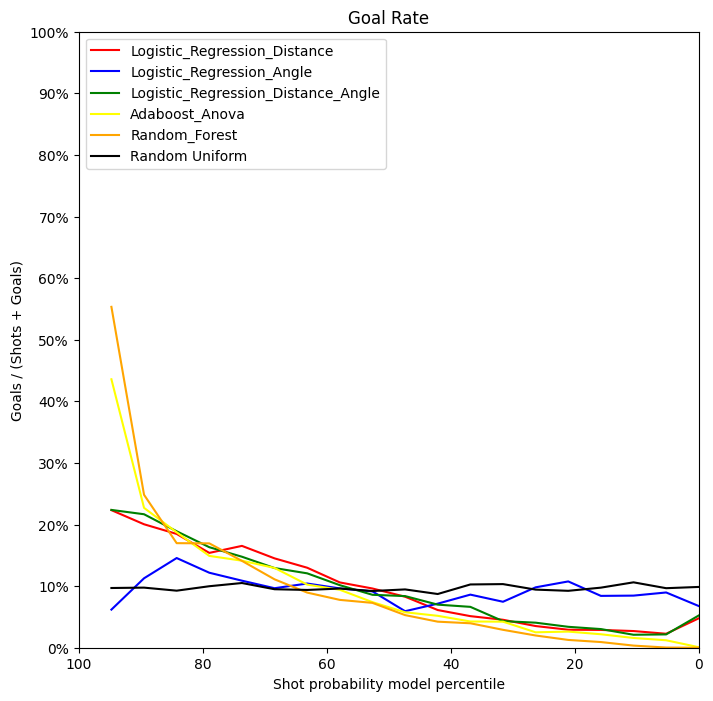

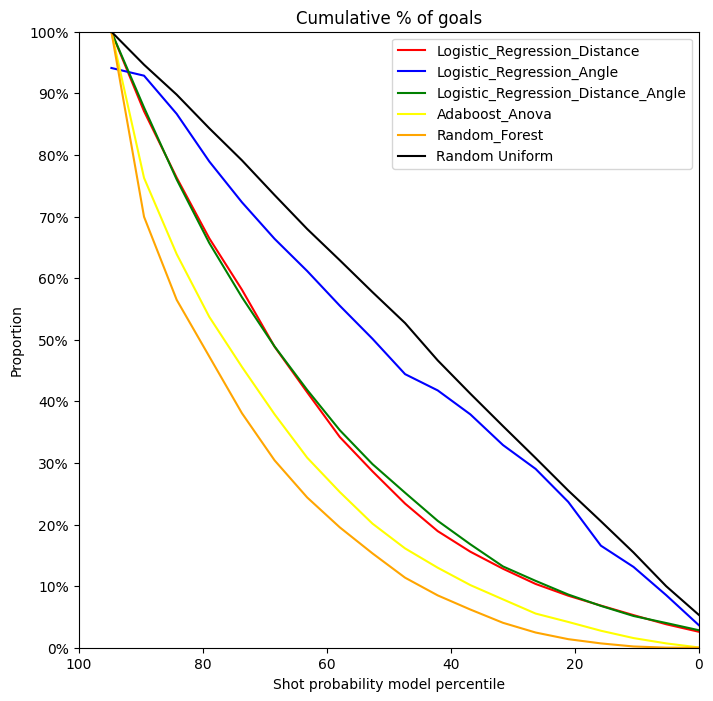

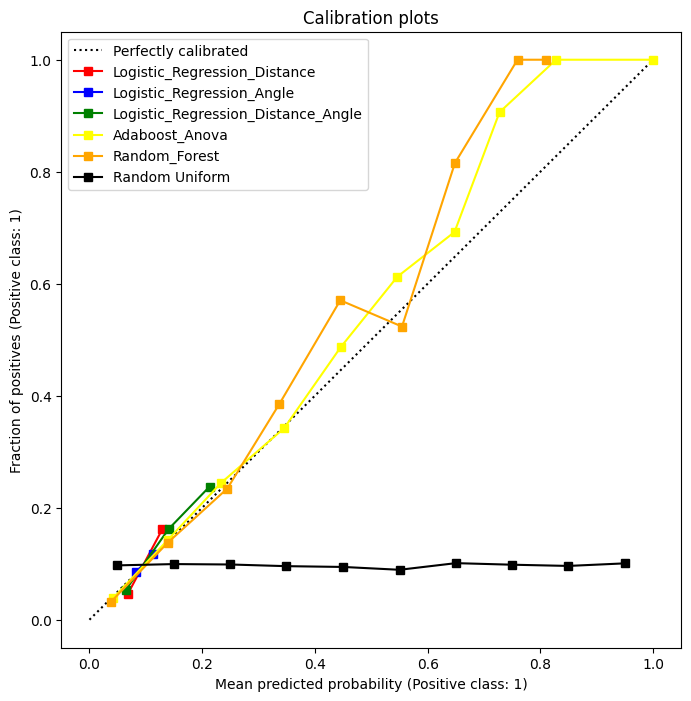

In [82]:
classifiers = [(clf_distance, 'Logistic_Regression_Distance', features_data[['Shot distance']], features_data['Is Goal']),
               (clf_angle, 'Logistic_Regression_Angle', features_data[['Shot angle']],  features_data['Is Goal']),
               (clf_distance_angle, 'Logistic_Regression_Distance_Angle', features_data[['Shot distance', 'Shot angle']], features_data['Is Goal']),
               (calibrated_clf_adaboost, 'Adaboost_Anova', X_test_adaboost, y_test_adaboost),
               (calibrated_clf_forest, 'Random_Forest', X_test_forest, y_test_forest)]


VizManager.plot_all_figures(classifiers, add_random=True)

In [1]:
# Test the Logistic Regression models on 2019 / Playoffs

season_year = 2019
season_type = "Playoffs"    
features_data = FeaturesManager.build_features([season_year], season_type)
# We take the absolute value, for symmetry reasons
features_data['Shot angle'] = features_data['Shot angle'].abs()
y_test = features_data['Is Goal']

print(classification_report(y_test, clf_distance.predict(features_data[['Shot distance']])))
print(classification_report(y_test, clf_angle.predict(features_data[['Shot angle']])))
print(classification_report(y_test, clf_distance_angle.predict(features_data[['Shot distance', 'Shot angle']])))


NameError: name 'FeaturesManager' is not defined

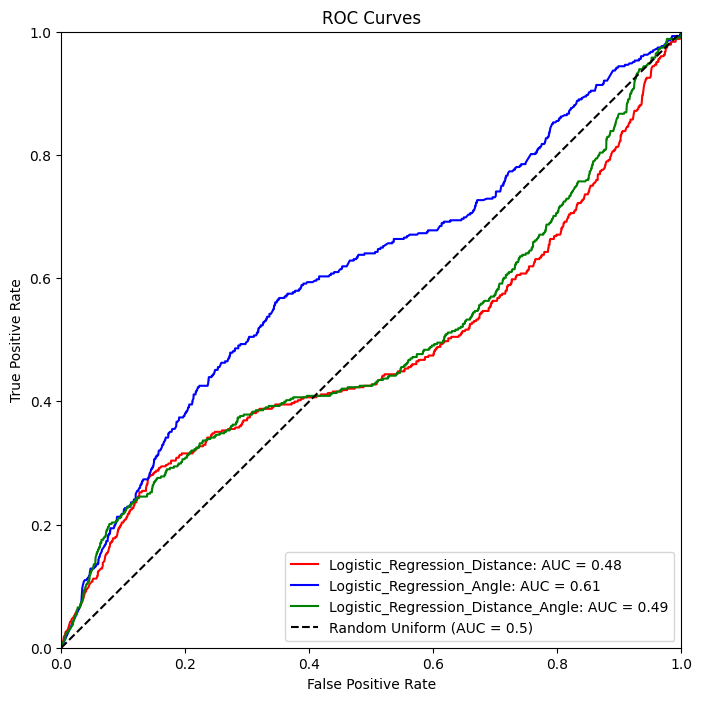

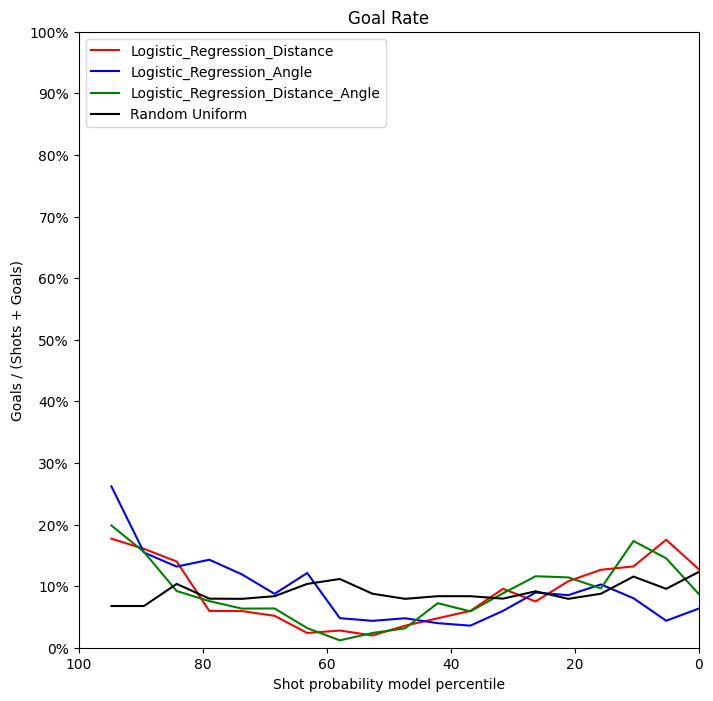

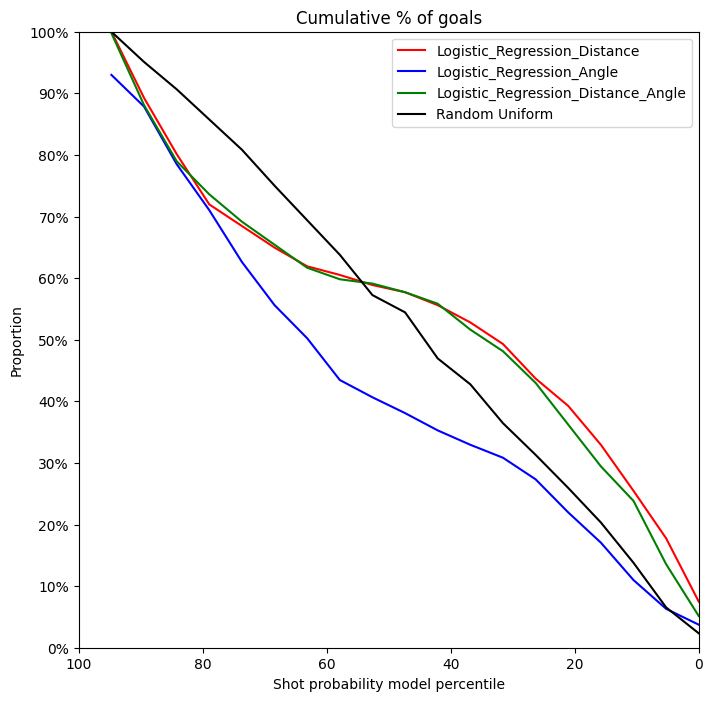

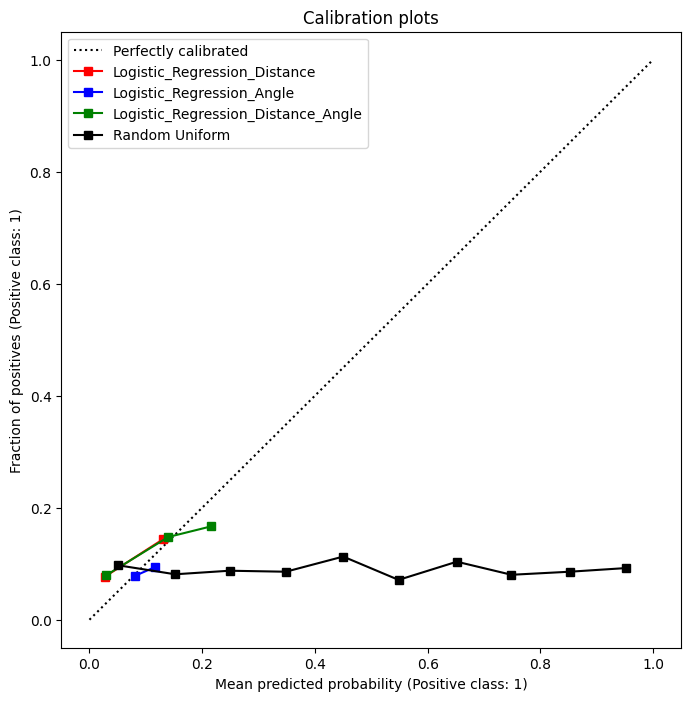

In [28]:
classifiers = [(clf_distance, 'Logistic_Regression_Distance', features_data[['Shot distance']], y_test),
               (clf_angle, 'Logistic_Regression_Angle', features_data[['Shot angle']], y_test),
               (clf_distance_angle, 'Logistic_Regression_Distance_Angle', features_data[['Shot distance', 'Shot angle']], y_test) ]


VizManager.plot_all_figures(classifiers, add_random=True)